![Mind Mapping](https://raw.githubusercontent.com/zacdeng/Machine-Learning/master/images/hw3.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv('./hw2/train.csv')

# Data analysis

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

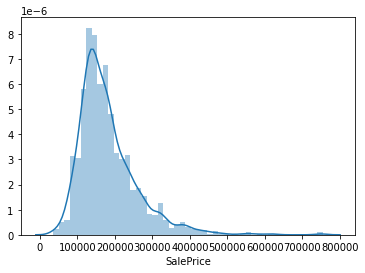

In [5]:
sns.distplot(df_train['SalePrice'])

In [6]:
df_train['SalePrice'].skew()

1.8828757597682129

In [7]:
df_train['SalePrice'].kurt()

6.536281860064529

The data conforms to the characteristics of normal distribution, but the skewness is relatively large, so the normal distribution change needs to be processed

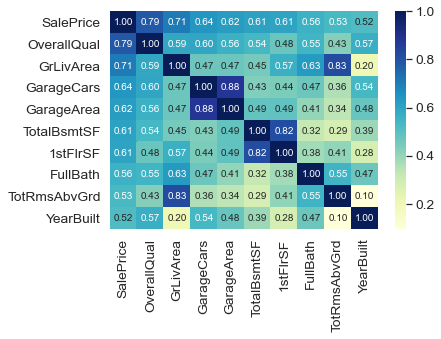

In [8]:
k = 10
corrmat = df_train.corr()
cols = corrmat.sort_values('SalePrice',ascending=False).head(k).index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values, 
                 cmap='YlGnBu')
plt.show()

* calculate the correlation of each tables

In [9]:
corrmat.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [10]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

* using np.corrcoef() to calculate the Person's r among top 10 
* then using sns.heatmap() to describe it

In [11]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

In [12]:
#sns.pairplot(df_train[cols],size=1.5)

# Data preprocessing

### Adjust the distribution of SalePrice


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

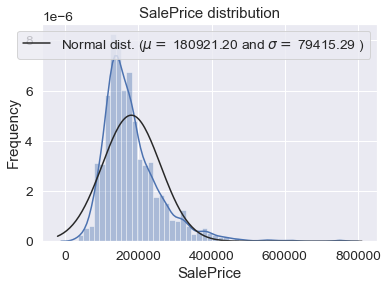

In [13]:
from scipy.stats import norm

sns.distplot(df_train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


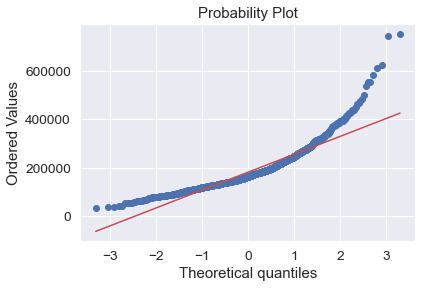

In [14]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

Logarithmic transformation： x = log（1+x）
将数据转化为贴近高斯分布的形式，最后利用np.expm1()转化为正常形式


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

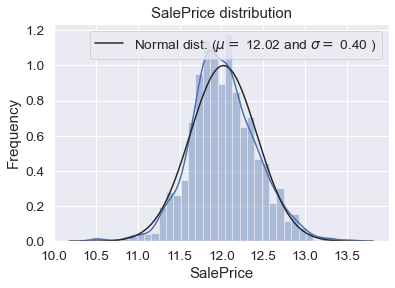

In [15]:
train_price_true = df_train["SalePrice"]
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
sns.distplot(df_train['SalePrice'] , fit=norm)

(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

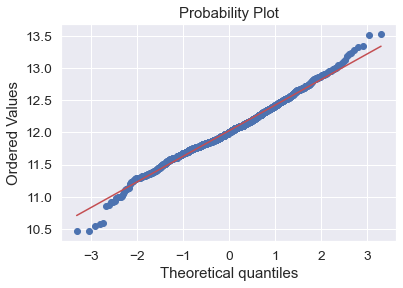

In [16]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

* 计算各特征值缺失数，得出百分比并合并汇表

In [17]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


* 加载test和train
* 将测试集和训练集合并统一处理

In [18]:
train = df_train
train_price = train['SalePrice']
validation = pd.read_csv('./hw2/test.csv')
validation_price = pd.read_csv('./hw2/sample_submission.csv')
validation['SalePrice'] = validation_price['SalePrice']
all_data = pd.concat((train,validation))

In [19]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


In [20]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864469


In [21]:
validation

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


* 计算Misiing Ratio
* 删掉缺失值为0的特征值

In [22]:
all_data_na = (all_data.isnull().sum() / all_data.isnull().count()) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
# 删掉缺失值为0的特征值
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

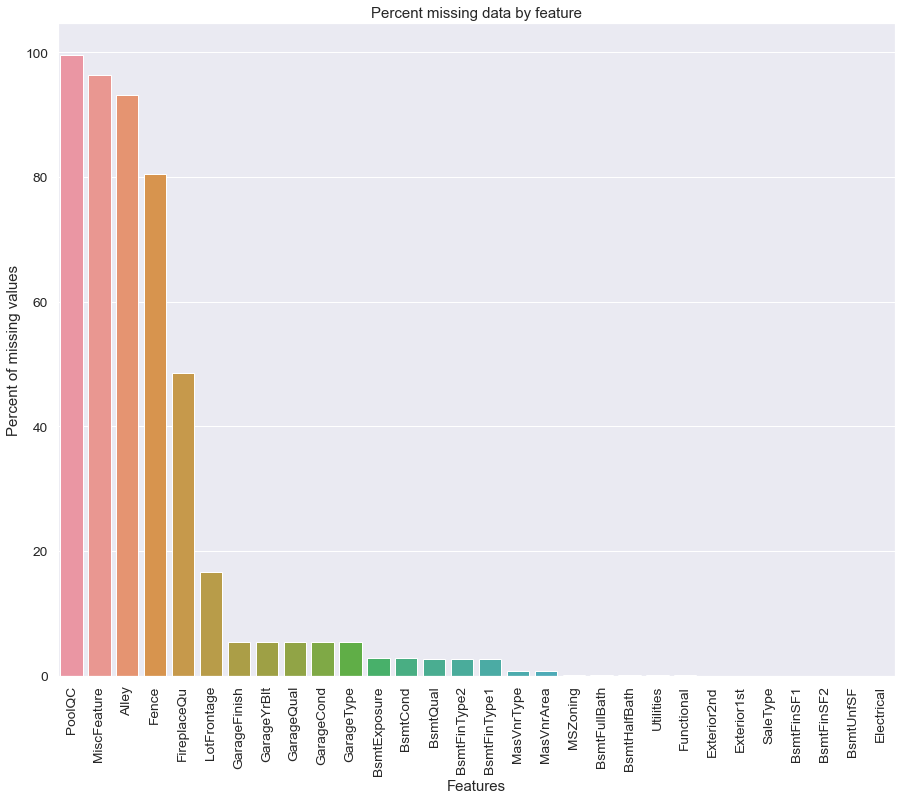

In [23]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

* PoolQC、MiscFrature、Alley、Fence、FireplaceQu的缺失率非常高
* 其他特征值略有缺失

# Case 1 : Using Ridge(L2) and Lasso(L1) to predict the price directly

### Model Training

In [24]:
from sklearn.model_selection import train_test_split
data = all_data

将非连续的int值特征转化为str形式方便处理

In [58]:
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)
data['YearBuilt'] = data['YearBuilt'].astype(str)
data['YearRemodAdd'] = data['YearRemodAdd'].astype(str)
data['GarageYrBlt'] = data['GarageYrBlt'].astype(str)

用平均值填补缺失值

In [26]:
x = data.loc[:,data.columns!='SalePrice']
mean_cols=x.mean()
x = x.fillna(mean_cols)  #填充缺失值

将合并后的数据集的非连续值通过pd.get_dummies将数据转换成one-hot编码，防止test和train特征值描述不同而产生的矩阵维度不对应

In [27]:
x_dum = pd.get_dummies(x)

分割train和validation

In [28]:
train_x = x_dum[:1460]
test_x = x_dum[1460:]
train_y = train_price

In [29]:
train_y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

划分训练集和验证集

In [30]:
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = 0.3,random_state = 1)

In [31]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

对比 Lasso（L1-norm）和 Ridge（L2-norm）的差异

In [32]:
models=[Ridge(),Lasso()]
names=['Ridge','Lasso']
score_=[]

In [33]:
def try_different_method(name,model):
    model.fit(x_train,y_train)
    model.predict(x_test)
    score = model.score(x_test,y_test)
    score_.append(str(score))
    print("Start " + name +'. \n')

In [34]:
for name,model in zip(names,models):
    try_different_method(name,model)

Start Ridge. 

Start Lasso. 



In [35]:
scores = pd.DataFrame({'methods':names,'score':score_})
scores.set_index('methods',inplace=True)
scores

,score
methods,
Ridge,0.8905443643399745
Lasso,0.7914315636114049


结果分析
* Ridge 要求数据集贴近高斯分布（前面已处理）
* Lasso 要求数据集贴近拉普拉斯分布（未处理）
* 结果显然Ridge好于Lasso（未处理数据集为拉普拉斯分布的原因）

### Model Testing

In [36]:
result = {}

def Predict(name, model):
    rets = model.predict(test_x)
    result[name] = np.expm1(rets)
    frame = pd.DataFrame({'SalePrice':np.expm1(rets)})
    print(frame)
    plt.figure(figsize=(25,10))
    plt.plot(np.arange(1461,1461+len(validation_price)), validation_price['SalePrice'], 'yo-', label='true value')
    plt.plot(np.arange(1461,1461+len(validation_price)), np.expm1(rets), 'o-', label='predict value')
    plt.xlabel("Houses' ID")
    plt.ylabel('SalePrice Prediction')
    plt.title('The Pridiction of SalePrice.')
    plt.legend()
    print(name)
    plt.show()

          SalePrice
0     123654.324186
1     162423.870682
2     172019.178191
3     196969.802124
4     200374.189067
...             ...
1454   82472.158479
1455   80779.084826
1456  158573.537072
1457  110941.553861
1458  208460.348273

[1459 rows x 1 columns]
Ridge


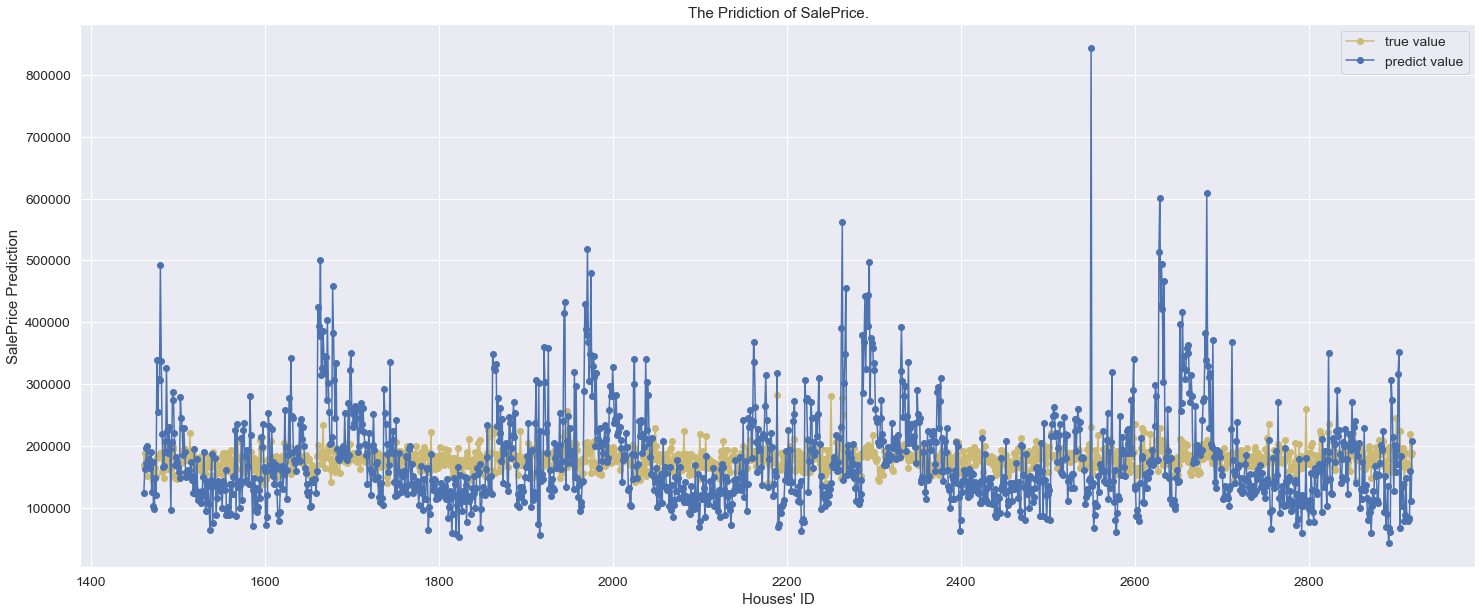

          SalePrice
0     145331.049528
1     153612.120356
2     190149.083065
3     191039.728430
4     170156.464131
...             ...
1454  107021.610403
1455  119917.332916
1456  176822.894025
1457  120921.274408
1458  223828.150033

[1459 rows x 1 columns]
Lasso


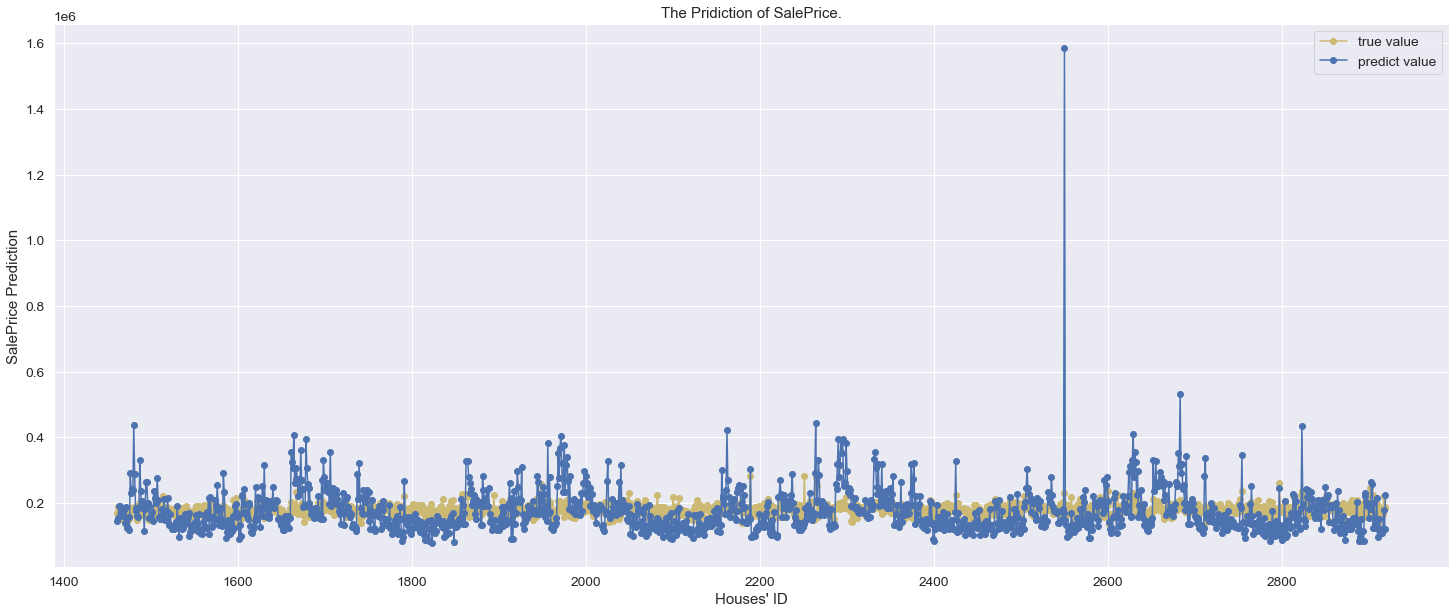

In [37]:
for name, model in zip(names,models):
    Predict(name,model)

In [38]:
result

{'Ridge': array([123654.32418629, 162423.87068196, 172019.17819082, ...,
        158573.53707236, 110941.55386086, 208460.34827268]),
 'Lasso': array([145331.04952757, 153612.12035643, 190149.0830655 , ...,
        176822.89402525, 120921.27440822, 223828.15003259])}

Save as the csv file

In [39]:
for name, ret in result.items():
    CSV = pd.DataFrame({'SalePrice':ret})
    path = './hw2/%s.csv' % name
    CSV.to_csv(path)

# Case 2 : Discrete the price then use Logisticregression to predict

### Model Training

##### discrete the price
* using scatter to display the distripution of the SalePrice

显示train中SalePrice的分布

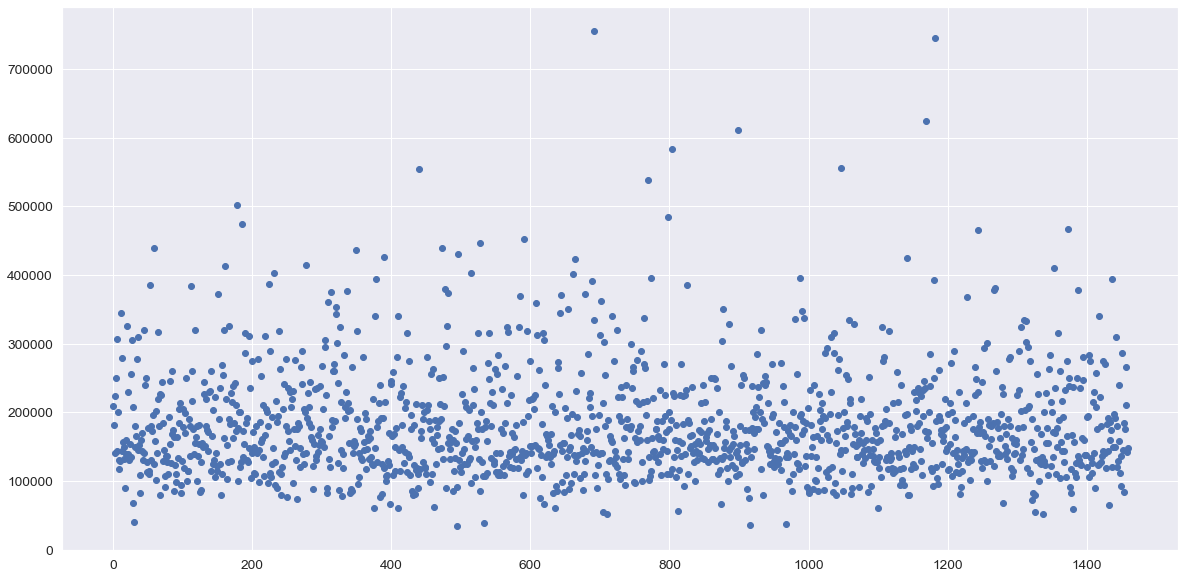

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(np.array(range(0,1460)),train_price_true)

显示validation中SalePrice的分布

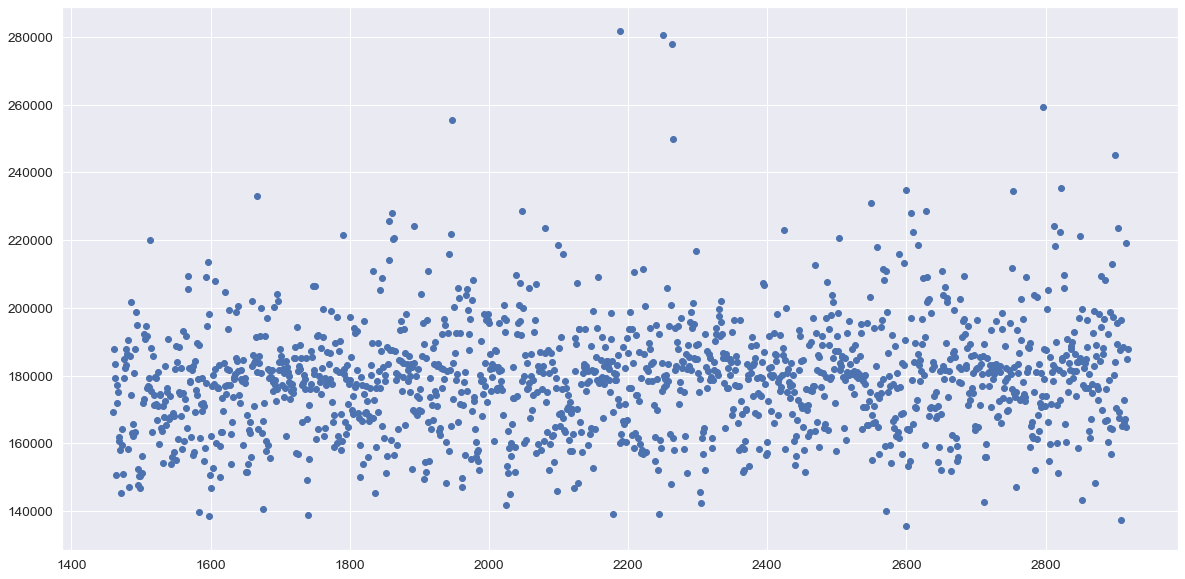

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(np.array(range(1460,2919)),validation_price.SalePrice)

结果显示：
* train和validation中SalePrice的分布有很大差异，一定意义上决定了训练结果的泛化性不够，得到的预测结果准确性差

* discrete the price with four layer
* {'cheap':below 150000 ; 'moderate':150000-200000 ; 'expensive':200000+}

In [42]:
train_y2 = []
validation_y = []

def trans(Price,ls):
    for price in Price:
        if price<=170000:
            ls.append('cheap')
        elif price>170000 and price<=200000:
            ls.append('moderate')
        else:
            ls.append('expensive')

In [43]:
trans(train_price_true,train_y2)
trans(validation_price.SalePrice,validation_y)

* Labels of train and validation after discreting

In [44]:
train_y2[:10]

['expensive',
 'moderate',
 'expensive',
 'cheap',
 'expensive',
 'cheap',
 'expensive',
 'moderate',
 'cheap',
 'cheap']

* Labels of validation after discreting

In [45]:
validation_y[:10]

['cheap',
 'moderate',
 'moderate',
 'moderate',
 'cheap',
 'moderate',
 'moderate',
 'moderate',
 'cheap',
 'cheap']

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

##### naive bayes : GaussianNB

*对 x_dum 中其他连续值做高斯分布处理*

In [63]:
features = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']

def transGaussian(features):
    for feature in features:
        x_dum[feature] = np.log1p(x_dum[feature])

transGaussian(features)

In [68]:
train_x_GNB = x_dum[:1460]
test_x_GNB = x_dum[1460:]
x_train_GNB, x_test_GNB, y_train_GNB, y_test_GNB = train_test_split(train_x_GNB, train_y2, test_size = 0.3, random_state=1)

In [69]:
model = GaussianNB()
scores = cross_val_score(model,train_x_GNB, train_y2,cv=10,scoring='accuracy')
print('The score of cv is :' + str(scores.mean()))
model.fit(x_train_GNB, y_train_GNB)
y_pred = model.predict(x_test_GNB)

The score of cv is :0.6150874928990862


##### naive bayes : MultinomialNB

In [75]:
x_train_MNB, x_test_MNB, y_train_MNB, y_test_MNB = train_test_split(train_x, train_y2, test_size = 0.3, random_state=1)

In [77]:
model2 = MultinomialNB()
scores = cross_val_score(model2,train_x, train_y2,cv=10,scoring='accuracy')
print('The score of cv is :' + str(scores.mean()))
model2.fit(x_train_MNB, y_train_MNB)
y_pred2 = model2.predict(x_test_MNB)

The score of cv is :0.6053809307557874


##### naive bayes : BernoulliNB

In [100]:
x_train_BNB, x_test_BNB, y_train_BNB, y_test_BNB = train_test_split(train_x, train_y2, test_size = 0.3, random_state=1)

In [101]:
model3 = BernoulliNB()
scores = cross_val_score(model3,train_x, train_y2,cv=10,scoring='accuracy')
print('The score of cv is :' + str(scores.mean()))
model3.fit(x_train_BNB, y_train_BNB)
y_pred3 = model3.predict(x_test_BNB)

The score of cv is :0.7671380800657404


### Model Testing

对比三种不同的NB下对validation测试的准确度

In [66]:
label_pred = model.predict(test_x_GNB)
accuracy_score(validation_y, label_pred)

0.4318026045236463

In [85]:
label_pred2 = model2.predict(test_x)
accuracy_score(validation_y, label_pred2)

0.4880054832076765

In [84]:
label_pred3 = model3.predict(test_x)
accuracy_score(validation_y, label_pred3)

0.29609321453050036

#### 三种 navie bayes 分类结果

In [94]:
def display(label_prediction):
    price = pd.DataFrame(validation_price)
    price['Label'] = label_prediction
    ret = price.set_index('Id')
    print(ret)

    plt.figure(figsize=(20,10))
    plt.xlabel('ID')
    plt.ylabel('SalePrice')
    plt.title('The result of classification by Naive Bayes')

    plt.hlines(y=170000, xmin=1459, xmax=2919, color='g', linestyles='--', linewidth=3.0)
    plt.hlines(y=200000, xmin=1459, xmax=2919, color='r', linestyles='--', linewidth=3.0)

    for index, row in ret.iterrows():
        if row.Label == 'cheap':
            plt.scatter(index, row.SalePrice, c='g')
        if row.Label == 'moderate':
            plt.scatter(index, row.SalePrice, c='b')
        if row.Label == 'expensive':
            plt.scatter(index, row.SalePrice, c='r')

* ##### GaussianNB

          SalePrice      Label
Id                            
1461  169277.052498      cheap
1462  187758.393989   moderate
1463  183583.683570   moderate
1464  179317.477511   moderate
1465  150730.079977  expensive
...             ...        ...
2915  167081.220949      cheap
2916  164788.778231      cheap
2917  219222.423400   moderate
2918  184924.279659      cheap
2919  187741.866657   moderate

[1459 rows x 2 columns]


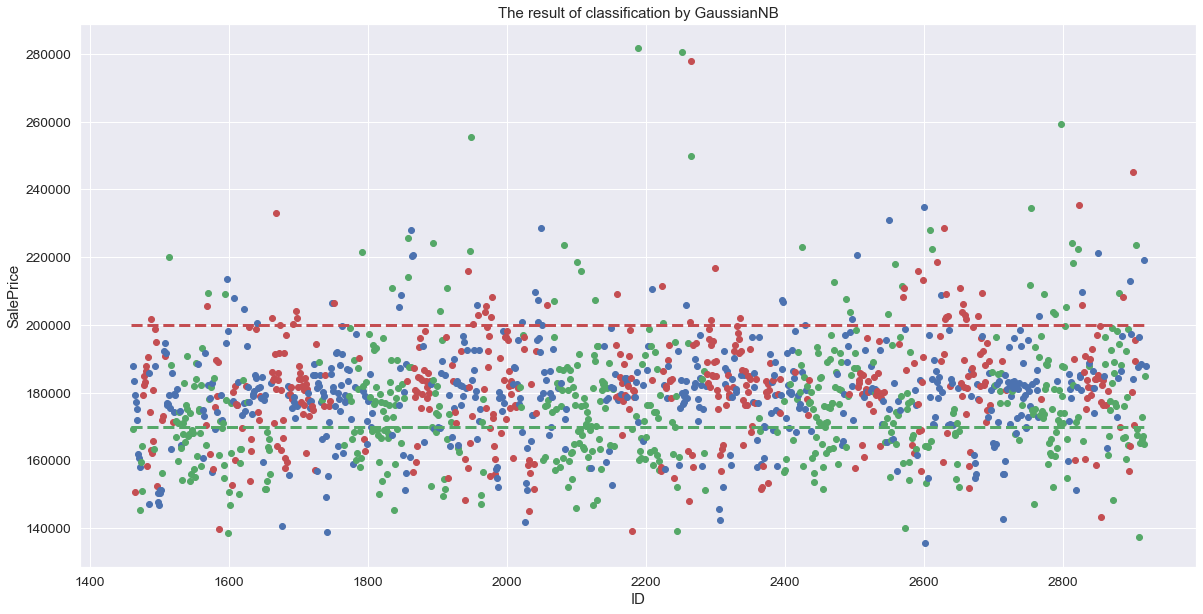

In [96]:
display(label_pred)

* ##### MultinomialNB

          SalePrice      Label
Id                            
1461  169277.052498      cheap
1462  187758.393989      cheap
1463  183583.683570  expensive
1464  179317.477511   moderate
1465  150730.079977      cheap
...             ...        ...
2915  167081.220949      cheap
2916  164788.778231      cheap
2917  219222.423400  expensive
2918  184924.279659      cheap
2919  187741.866657   moderate

[1459 rows x 2 columns]


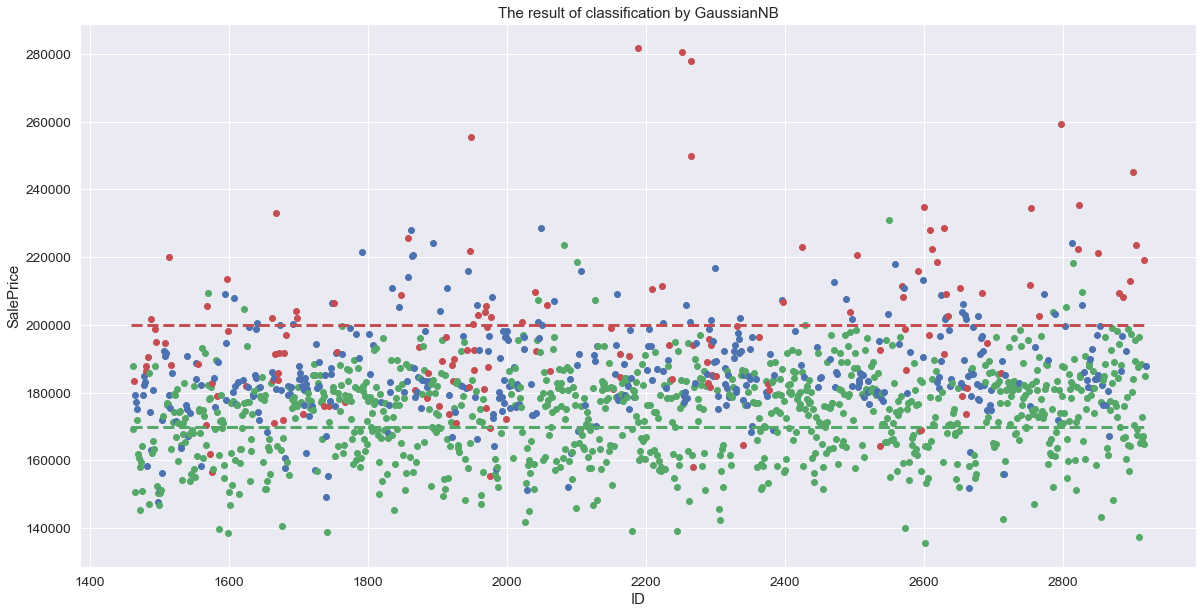

In [97]:
display(label_pred2)

* ##### BernoulliNB

          SalePrice      Label
Id                            
1461  169277.052498      cheap
1462  187758.393989      cheap
1463  183583.683570   moderate
1464  179317.477511  expensive
1465  150730.079977   moderate
...             ...        ...
2915  167081.220949      cheap
2916  164788.778231      cheap
2917  219222.423400      cheap
2918  184924.279659      cheap
2919  187741.866657   moderate

[1459 rows x 2 columns]


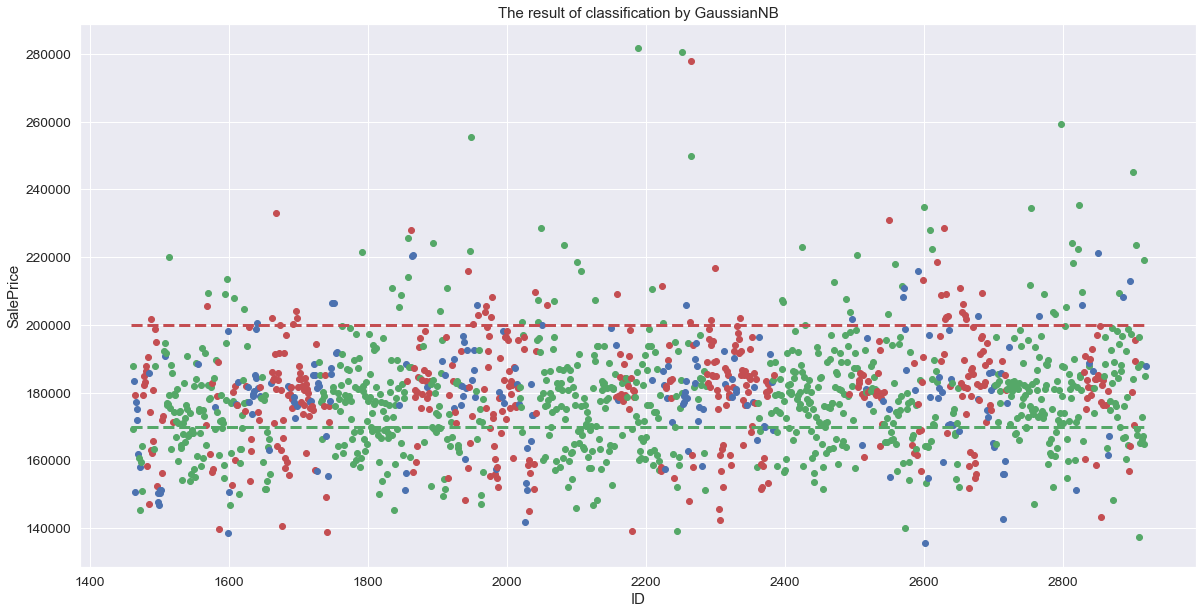

In [99]:
display(label_pred3)